In [1]:
import numpy as np
import rpy2.rinterface as ri
from rpy2.robjects.packages import importr
from rpy2.robjects.numpy2ri import numpy2ri
ri.initr()

0

In [2]:
vine_copula = importr('VineCopula')

In [3]:
dim = 3
structure = np.zeros((dim, dim), dtype=int)
for i in range(dim):
    structure[i, 0:i+1, ] = i + 1
    
structure

array([[1, 0, 0],
       [2, 2, 0],
       [3, 3, 3]])

In [4]:
family = np.zeros((dim, dim), dtype=int)
family[1, 0] = 1
family[2, 0] = 3
family

array([[0, 0, 0],
       [1, 0, 0],
       [3, 0, 0]])

In [5]:
par = np.zeros((dim, dim))
par[1, 0] = vine_copula.BiCopTau2Par(family[1, 0], 0.5)[0]
par[2, 0] = vine_copula.BiCopTau2Par(family[2, 0], 0.9)[0]
par

array([[  0.        ,   0.        ,   0.        ],
       [  0.70710678,   0.        ,   0.        ],
       [ 18.        ,   0.        ,   0.        ]])

In [6]:
par2 = np.zeros((dim, dim))
par2

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [7]:
r_structure = numpy2ri(structure)
r_family =  numpy2ri(family)
r_par =  numpy2ri(par)
r_par2 =  numpy2ri(par2)

In [8]:
RVM = vine_copula.RVineMatrix(r_structure, r_family, r_par, r_par2)

In [9]:
np.asarray(vine_copula.RVinePar2Tau(RVM))

array([[ 0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. ],
       [ 0.9,  0. ,  0. ]])

In [10]:
r_simdata = vine_copula.RVineSim(1000, RVM)
simdata = np.asarray(r_simdata)
simdata

array([[ 0.55421569,  0.40356764,  0.64202206],
       [ 0.65827388,  0.29181934,  0.73480733],
       [ 0.99010317,  0.89002716,  0.98169645],
       ..., 
       [ 0.22041895,  0.23710263,  0.2450196 ],
       [ 0.93175326,  0.54869385,  0.93640895],
       [ 0.81479468,  0.16283576,  0.87195434]])

'Independence'

In [11]:
from dependence import vinecopula

pyVine = vinecopula.VineCopula(structure, family, par, par2)
n = 20000
sample = pyVine.get_sample(n)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

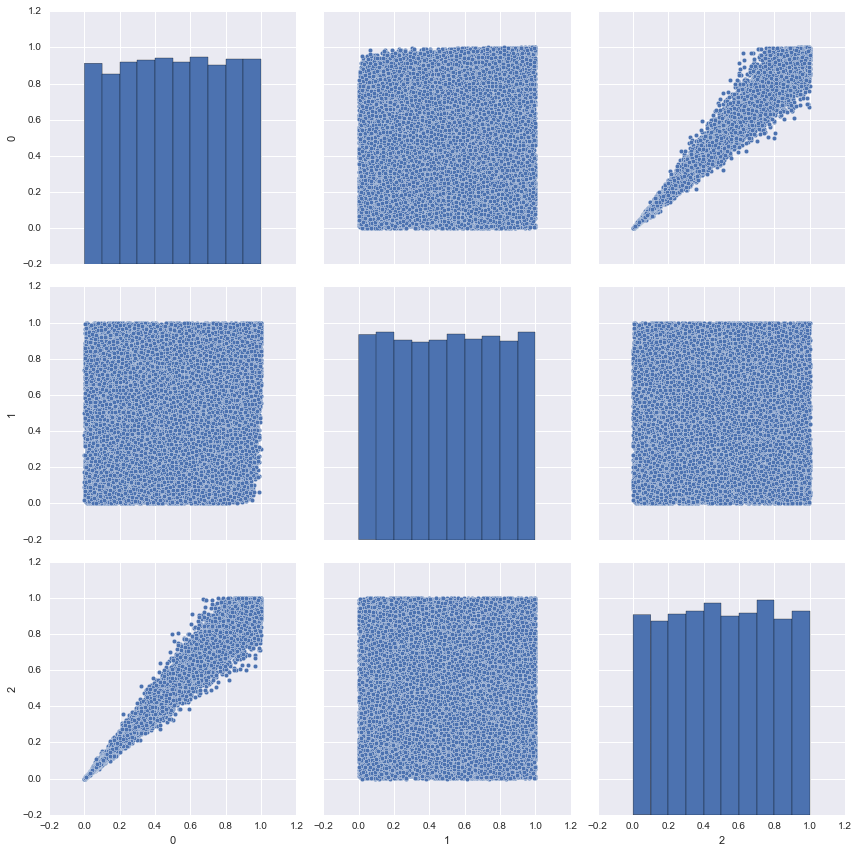

In [13]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(sample)
fig = sns.pairplot(df, size=4)

In [14]:
from scipy.stats import norm, expon
import scipy.stats
margins = [norm(), norm(), expon()]
joint_sample = np.zeros((n, dim))
for i, marginal in enumerate(margins):
    joint_sample[:, i] = marginal.ppf(sample[:, i])

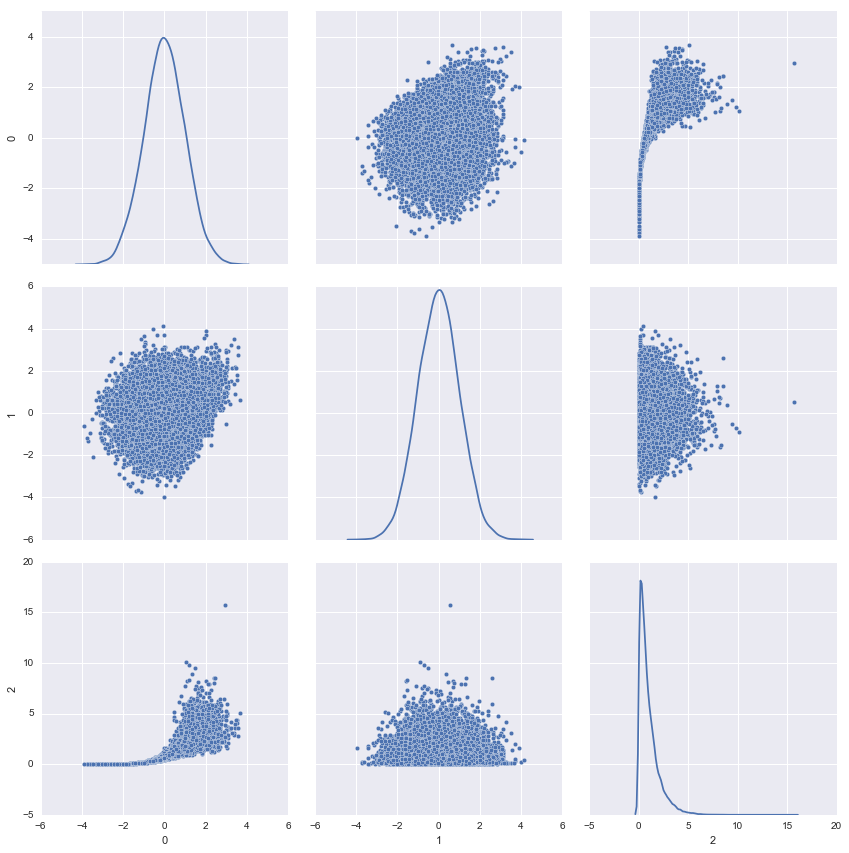

In [15]:
df = pd.DataFrame(joint_sample)
fig = sns.pairplot(df, size=4, diag_kind = 'kde')

In [16]:
import openturns as ot
margins = [ot.Normal(), ot.Normal(), ot.Exponential()]
joint_sample = np.zeros((n, dim))
for i, marginal in enumerate(margins):
    joint_sample[:, i] = np.asarray(marginal.computeQuantile(sample[:, i])).ravel()

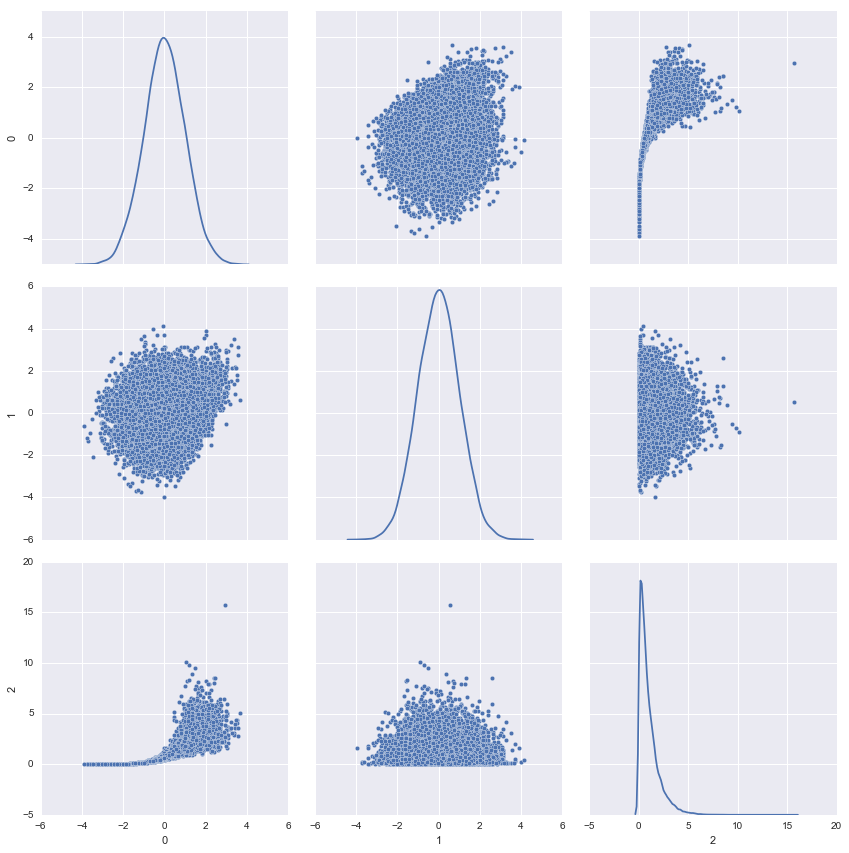

In [17]:
df = pd.DataFrame(joint_sample)
fig = sns.pairplot(df, size=4, diag_kind = 'kde')

In [25]:
def get_pos(dim, k):
    ll = np.cumsum(range(dim-1, 0, -1))
    i = np.where(k < ll)[0][0]
    j = dim - (ll[i] - k)
    return i, j


        
d = 6
k = 14
get_pos(d, k)

(4, 5)

In [23]:
d = 5
for k in range(0, 9):    
    i = 
    j = k % ( d - 1)
    print k, (i, j)

SyntaxError: invalid syntax (<ipython-input-23-886c63316ad0>, line 3)